In [1]:
import os
import sys
import copy
import numpy as np
import rmgpy.data.rmg
import rmgpy.chemkin

import compare_reaction

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['DATABASE_DIR'])
import database_fun

Loading DFT database from /home/moon/autoscience/autoscience_workflow/database


In [43]:
ref_rxn = database_fun.index2reaction(206)
display(ref_rxn)

In [2]:
def get_i_thing(thing, thing_list):
    for i in range(len(thing_list)):
        if thing.is_isomorphic(thing_list[i]):
            return i
    return -1

In [47]:
get_i_thing(ref_rxn, reaction_list2)
compare_reaction.identify_rmg_family(reaction_list2[1272])

ThermoData(Tdata=([300,400,500,600,800,1000,1500],'K'), Cpdata=([60.2599,68.0494,74.7775,80.9311,90.8846,97.4337,105.393],'J/(mol*K)'), H298=(-477.191,'kJ/mol'), S298=(269.551,'J/(mol*K)'), Cp0=(33.2579,'J/(mol*K)'), CpInf=(103.931,'J/(mol*K)'), comment="""Thermo group additivity estimation: group(O2s-(Cds-Cd)(Cds-Cd)) + group(O2s-(Cds-O2d)H) + group(Cds-OdOsOs) + group(Li-OCOdO) + radical(OC=OOJ)""").
The thermo for this species is probably wrong! Setting CpInf = Cphigh for Entropy calculationat T = 2000.0 K...
ThermoData(Tdata=([300,400,500,600,800,1000,1500],'K'), Cpdata=([60.2599,68.0494,74.7775,80.9311,90.8846,97.4337,105.393],'J/(mol*K)'), H298=(-477.191,'kJ/mol'), S298=(269.551,'J/(mol*K)'), Cp0=(33.2579,'J/(mol*K)'), CpInf=(103.931,'J/(mol*K)'), comment="""Thermo group additivity estimation: group(O2s-(Cds-Cd)(Cds-Cd)) + group(O2s-(Cds-O2d)H) + group(Cds-OdOsOs) + group(Li-OCOdO) + radical(OC=OOJ)""").
The thermo for this species is probably wrong! Setting CpInf = Cphigh for En

TypeError: must be real number, not list

In [7]:
def get_all_i_things(thing, thing_list):
    indices = []
    for i in range(len(thing_list)):
        if thing.is_isomorphic(thing_list[i]):
            indices.append(i)
    return indices

In [16]:
def reactions_in_same_direction(reaction1, reaction2):
    assert reaction1.is_isomorphic(reaction2), 'Reactions are not even isomorphic'
    if len(reaction1.reactants) != len(reaction2.reactants):
        return False
    reactants_to_match = [r for r in reaction1.reactants]
    counter = 0
    while reactants_to_match:
        for i in range(len(reaction2.reactants)):
            if reaction2.reactants[i].is_isomorphic(reactants_to_match[0]):
                reactants_to_match.remove(reactants_to_match[0])
                break
        else:
            return False
        
        
        if counter >= len(reaction1.reactants):
            return False
        counter += 1
        
    return True

In [9]:
def plot_kinetics(rxns, labels=None):
    """Function for plotting reaction kinetics
    Takes in a list of RMG reactions (rmgpy.reaction.Reaction) or a single reaction
    """
    plt.xlabel('1000 / T (K^-1)')
    plt.ylabel('log10(k)')

    if type(rxns) != list:
        rxns = [rxns]

    T = np.linspace(300, 3000, 1001)
    for rxn in rxns:
        k = np.zeros(len(T))
        for i in range(0, len(T)):
            k[i] = rxn.get_rate_coefficient(T[i], 101325)
        plt.plot(1000.0 / T, np.log10(k))

    if labels:
        plt.legend(labels)
    plt.show()

In [3]:
# ref mechanism
# "fixed" rmg min 3
mech_1_inp = '/home/moon/autoscience/aramco/pruned_aramco.inp'
mech_1_dict = '/home/moon/autoscience/aramco/species_dictionary.txt'
species_list1, reaction_list1 = rmgpy.chemkin.load_chemkin_file(mech_1_inp, mech_1_dict)

mech_2_inp = '/home/moon/autoscience/compare_to_aramco/branching/twenty_separate/rmg_min_4/chem_annotated.inp'
mech_2_dict = '/home/moon/autoscience/compare_to_aramco/branching/twenty_separate/rmg_min_4/species_dictionary.txt'
species_list2, reaction_list2 = rmgpy.chemkin.load_chemkin_file(mech_2_inp, mech_2_dict)


mech_3_inp = '/home/moon/autoscience/fuels/butane_20240501/chem_annotated.inp'
mech_3_dict = '/home/moon/autoscience/fuels/butane_20240501/species_dictionary.txt'
species_list3, reaction_list3 = rmgpy.chemkin.load_chemkin_file(mech_3_inp, mech_3_dict)

In [4]:
sp68 = rmgpy.species.Species(smiles='CC1OCC1')

In [7]:
get_i_thing(sp68, species_list2)

-1

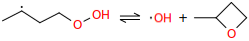

1181
-1
563


In [19]:
ref_rxn = database_fun.index2reaction(449)
display(ref_rxn)


print(get_i_thing(ref_rxn, reaction_list1))
print(get_i_thing(ref_rxn, reaction_list2))
print(get_i_thing(ref_rxn, reaction_list3))

In [24]:
print(reaction_list3[563].products[1])

CC1CCO1(141)


In [22]:
reaction_list3[563].kinetics

Chebyshev(coeffs=[[3.437,0.3936,-0.158,0.03773],[5.299,0.3864,-0.08736,-0.01366],[-0.2101,0.236,-0.03364,-0.01413],[-0.1476,0.1563,-0.01527,-0.01011],[-0.0817,0.07103,0.008203,-0.0103],[-0.03402,0.01486,0.01747,-0.005962]], kunits='s^-1', Tmin=(300,'K'), Tmax=(2000,'K'), Pmin=(0.01,'atm'), Pmax=(98.692,'atm'))

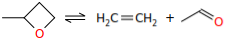

-1
-1
566


In [15]:
ref_rxn = database_fun.index2reaction(452)
display(ref_rxn)


print(get_i_thing(ref_rxn, reaction_list1))
print(get_i_thing(ref_rxn, reaction_list2))
print(get_i_thing(ref_rxn, reaction_list3))

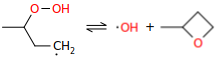

1183
-1
557


In [16]:
ref_rxn = database_fun.index2reaction(450)
display(ref_rxn)


print(get_i_thing(ref_rxn, reaction_list1))
print(get_i_thing(ref_rxn, reaction_list2))
print(get_i_thing(ref_rxn, reaction_list3))

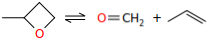

-1
-1
565


In [20]:
ref_rxn = database_fun.index2reaction(451)
display(ref_rxn)


print(get_i_thing(ref_rxn, reaction_list1))
print(get_i_thing(ref_rxn, reaction_list2))
print(get_i_thing(ref_rxn, reaction_list3))

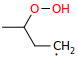

174
58
49


In [18]:
my_sp = ref_rxn.reactants[0]
display(my_sp)

print(get_i_thing(my_sp, species_list1))
print(get_i_thing(my_sp, species_list2))
print(get_i_thing(my_sp, species_list3))

In [30]:
r1s = get_all_i_things(ref_rxn, reaction_list1)

r2s = get_all_i_things(ref_rxn, reaction_list2)

r3s = get_all_i_things(ref_rxn, reaction_list3)

In [17]:
r1s

[1106]

In [18]:
r2s

[65]

In [31]:
r3s

[108]

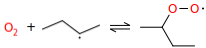

In [33]:
reaction_list3[r3s[0]]

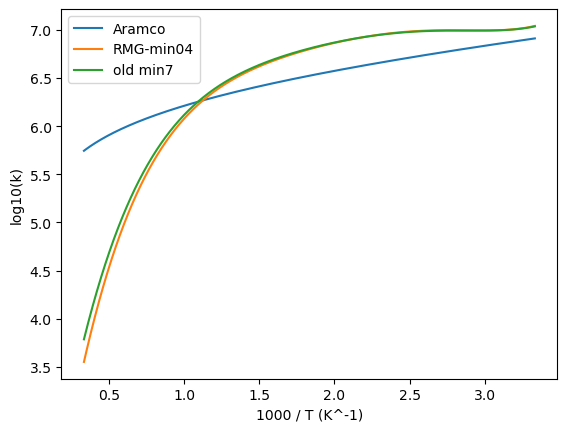

In [34]:
plot_kinetics([reaction_list1[r1s[0]], reaction_list2[r2s[0]], reaction_list3[r3s[0]]], ['Aramco', 'RMG-min04', 'old min7'])

In [39]:
def plot_thermos(thermos, labels=None):
    if type(thermos) != list:
        thermos = [thermos]
    if labels is None:
        labels = ['' for t in thermos]
    linestyles = ['solid', 'dashed', 'dotted']
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(12, 3)
    fig.tight_layout()
    ax[0].set_xlabel('Temperature (K)')
    ax[0].set_ylabel('H (kJ / mol)')
    ax[0].set_title('Enthalpy vs. Temperature')
    ax[1].set_xlabel('Temperature (K)')
    ax[1].set_ylabel('S (kJ / mol K)')
    ax[1].set_title('Entropy vs. Temperature')
    ax[2].set_xlabel('Temperature (K)')
    ax[2].set_ylabel('Cp (kJ / mol K)')
    ax[2].set_title('Heat Capacity vs. Temperature')
    T = np.linspace(800, 1000, 1001)
    for m, thermo in enumerate(thermos):
        if 'cantera' in str(type(thermo)).lower() and hasattr(thermo, 'thermo'):
            thermo = thermo.thermo
        H = np.zeros(len(T))
        S = np.zeros(len(T))
        Cp = np.zeros(len(T))
        if 'rmgpy' in str(type(thermo)).lower():
            for i in range(0, len(T)):
                H[i] = thermo.get_enthalpy(T[i]) / 1000.0
                S[i] = thermo.get_entropy(T[i]) / 1000.0
                Cp[i] = thermo.get_heat_capacity(T[i]) / 1000.0
        else:  # cantera
            for i in range(0, len(T)):
                H[i] = thermo.h(T[i]) / 1e6  # J/kmol
                S[i] = thermo.s(T[i]) / 1e6
                Cp[i] = thermo.cp(T[i]) / 1e6  # J/mol K
        ax[0].plot(T, H, linestyle=linestyles[m % len(linestyles)])
        ax[1].plot(T, S, linestyle=linestyles[m % len(linestyles)])
        ax[2].plot(T, Cp, linestyle=linestyles[m % len(linestyles)])
    ax[0].legend(labels)
    ax[1].legend(labels)
    ax[2].legend(labels)
    ax[2].yaxis.get_major_formatter().set_useOffset(False)
    plt.subplots_adjust(wspace=0.25)
    plt.show()

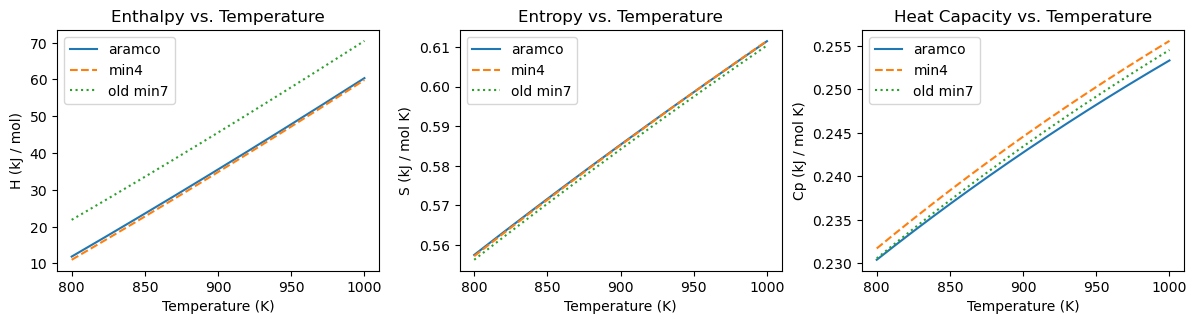

In [40]:
plot_thermos([
    reaction_list1[r1s[0]].products[0],
    reaction_list2[r2s[0]].products[0],
    reaction_list3[r3s[0]].products[0],
], ['aramco', 'min4', 'old min7'])